# Khai phá dữ liệu và Tự động Gán nhãn cho Biceps Curl

Notebook này sẽ thực hiện 3 bước:
1. **Trích xuất dữ liệu**: Chạy qua tất cả video trong `data/biceps curl` và dùng `bicep_curl_analyze.py` để lấy dữ liệu thô.
2. **Tự động Gán nhãn**: Tự động gán nhãn 'Correct'/'Incorrect' cho mỗi rep dựa trên các lỗi do rule-based phát hiện.
3. **Vẽ biểu đồ**: Vẽ biểu đồ phân phối nhãn và lưu lại.

In [16]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
import numpy as np

# === SỬA LỖI ĐƯỜNG DẪN (PATH FIX) ===
# Lấy đường dẫn của notebook này (ví dụ: .../project/notebooks)
notebook_dir = os.path.abspath(os.getcwd())
print(f"Thư mục notebook hiện tại: {notebook_dir}")

# Lấy đường dẫn thư mục gốc (lùi 1 cấp, ví dụ: .../project)
project_root = os.path.abspath(os.path.join(notebook_dir, '..'))

# Thêm đường dẫn gốc vào sys.path
if project_root not in sys.path:
    sys.path.insert(0, project_root)
    print(f"Đã thêm thư mục gốc vào path: {project_root}")
else:
    print(f"Thư mục gốc đã có trong path: {project_root}")

# Kiểm tra xem 'models' có ở đó không
models_path = os.path.join(project_root, 'models')
if not os.path.isdir(models_path):
    print(f"CẢNH BÁO: Không tìm thấy thư mục 'models' tại: {models_path}")
# ======================================

try:
    # Bây giờ câu lệnh import sẽ hoạt động
    from models.rule_based_model.bicep_curl_analyze import analyze_video_to_dataframe
    print("Đã import 'analyze_video_to_dataframe' thành công.")
except ImportError as e:
    print(f"LỖI IMPORT: {e}")
    print("Không thể import hàm. Hãy đảm bảo tệp 'models/rule_based_model/bicep_curl_analyze.py' tồn tại.")

warnings.filterwarnings('ignore')


Thư mục notebook hiện tại: e:\Learning\Collage\2026\hocki1\PBL 6\notebooks
Đã thêm thư mục gốc vào path: e:\Learning\Collage\2026\hocki1\PBL 6
Đã import 'analyze_video_to_dataframe' thành công.


## Bước 1: Trích xuất dữ liệu từ Video

Chúng ta sẽ chạy qua mọi tệp `.mp4` trong `data/biceps curl`.

In [20]:
VIDEO_DIR = '../data/biceps curl' 
OUTPUT_CSV_RAW_FRAMES = 'bicep_curl_all_frames_data.csv'

all_video_dfs = []
# Đảm bảo thư mục tồn tại
if not os.path.isdir(VIDEO_DIR):
    print(f"LỖI: Không tìm thấy thư mục: {VIDEO_DIR}")
else:
    video_files = [f for f in os.listdir(VIDEO_DIR) if f.endswith(('.mp4', '.avi', '.mov'))]
    
    print(f"Tìm thấy {len(video_files)} video. Bắt đầu trích xuất...")

    for video_id, filename in enumerate(tqdm(video_files)):
        video_path = os.path.join(VIDEO_DIR, filename)
        
        try:
            # Chạy hàm analyze (Lượt 1)
            (df_summary, fps, rep_time_boundaries) = analyze_video_to_dataframe(video_path)
            
            if not df_summary.empty:
                df_summary['video_id'] = video_id
                df_summary['video_name'] = filename
                all_video_dfs.append(df_summary)
            else:
                print(f"Cảnh báo: Không có dữ liệu từ video {filename}")
                
        except Exception as e:
            print(f"LỖI khi xử lý video {filename}: {e}")

    if all_video_dfs:
        # Kết hợp tất cả DataFrame từ các video lại
        full_raw_data = pd.concat(all_video_dfs, ignore_index=True)
        
        # Lưu tệp CSV chứa dữ liệu của TẤT CẢ các frame
        full_raw_data.to_csv(OUTPUT_CSV_RAW_FRAMES, index=False, encoding='utf-8')
        print(f"\nĐã lưu dữ liệu thô của {len(full_raw_data)} frames vào tệp: {OUTPUT_CSV_RAW_FRAMES}")
    else:
        print("Không có dữ liệu nào được trích xuất.")

Tìm thấy 63 video. Bắt đầu trích xuất...


  0%|          | 0/63 [00:00<?, ?it/s]

[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\01502df8-593c-42d0-86ae-7cbd48d8741a.mp4
[Analyze Bicep] Video gốc: 1920x1080 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 32


  2%|▏         | 1/63 [00:02<02:11,  2.12s/it]

[Analyze Bicep] Ket thuc Rep 1 tai frame 68
[Analyze Bicep] Đã phân tích 75 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 1 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\0244565c-a9cc-4775-9011-1f62d67dbd4c.mp4
[Analyze Bicep] Video gốc: 1280x720 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 1
[Analyze Bicep] Ket thuc Rep 1 tai frame 19
[Analyze Bicep] Bat dau Rep 2 tai frame 53
[Analyze Bicep] Ket thuc Rep 2 tai frame 109
[Analyze Bicep] Bat dau Rep 3 tai frame 140
[Analyze Bicep] Ket thuc Rep 3 tai frame 219


  3%|▎         | 2/63 [00:06<03:37,  3.56s/it]

[Analyze Bicep] Đã phân tích 234 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 3 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\053483c5-05f0-4196-935d-9215435ea6a7.mp4
[Analyze Bicep] Video gốc: 1920x1080 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 17
[Analyze Bicep] Ket thuc Rep 1 tai frame 47


  5%|▍         | 3/63 [00:08<02:38,  2.64s/it]

[Analyze Bicep] Đã phân tích 59 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 1 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\059bbe7c-f364-46ec-a4e3-d952f9b722dc.mp4
[Analyze Bicep] Video gốc: 1280x720 @ 30.00 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 23
[Analyze Bicep] Ket thuc Rep 1 tai frame 99


  6%|▋         | 4/63 [00:11<02:40,  2.72s/it]

[Analyze Bicep] Đã phân tích 141 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 1 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\0b43a151-8995-4f7e-8568-45d65996a19c.mp4
[Analyze Bicep] Video gốc: 1920x1080 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 3
[Analyze Bicep] Ket thuc Rep 1 tai frame 66
[Analyze Bicep] Bat dau Rep 2 tai frame 122


  8%|▊         | 5/63 [00:14<02:47,  2.90s/it]

[Analyze Bicep] Đã phân tích 138 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 2 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\0e4e1920-cb00-4d3e-bf06-0a5f67a58b8d.mp4
[Analyze Bicep] Video gốc: 1280x720 @ 30.00 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 9
[Analyze Bicep] Ket thuc Rep 1 tai frame 40
[Analyze Bicep] Bat dau Rep 2 tai frame 85
[Analyze Bicep] Ket thuc Rep 2 tai frame 119
[Analyze Bicep] Bat dau Rep 3 tai frame 163
[Analyze Bicep] Ket thuc Rep 3 tai frame 197


 10%|▉         | 6/63 [00:18<03:19,  3.49s/it]

[Analyze Bicep] Đã phân tích 229 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 3 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\1692398d-235d-42c2-89d8-95e930358ce1.mp4
[Analyze Bicep] Video gốc: 1920x1080 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 23


 11%|█         | 7/63 [00:20<02:46,  2.97s/it]

[Analyze Bicep] Ket thuc Rep 1 tai frame 69
[Analyze Bicep] Đã phân tích 77 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 1 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\177e113c-4f8d-4d86-b7cf-1d83c447782b.mp4
[Analyze Bicep] Video gốc: 1920x1080 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 2
[Analyze Bicep] Ket thuc Rep 1 tai frame 38
[Analyze Bicep] Bat dau Rep 2 tai frame 64


 13%|█▎        | 8/63 [00:22<02:28,  2.70s/it]

[Analyze Bicep] Đã phân tích 82 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 2 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\19b1bc19-aa52-4a0d-a448-68b9ba6f22b7.mp4
[Analyze Bicep] Video gốc: 1280x720 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 8
[Analyze Bicep] Ket thuc Rep 1 tai frame 44
[Analyze Bicep] Bat dau Rep 2 tai frame 61
[Analyze Bicep] Ket thuc Rep 2 tai frame 101
[Analyze Bicep] Bat dau Rep 3 tai frame 123


 14%|█▍        | 9/63 [00:26<02:47,  3.11s/it]

[Analyze Bicep] Đã phân tích 194 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 3 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\1aedc023-1054-4518-bf76-6f87c12e9ca5.mp4
[Analyze Bicep] Video gốc: 1280x720 @ 30.00 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 32
[Analyze Bicep] Ket thuc Rep 1 tai frame 40
[Analyze Bicep] Bat dau Rep 2 tai frame 154
[Analyze Bicep] Ket thuc Rep 2 tai frame 155


 16%|█▌        | 10/63 [00:30<03:00,  3.40s/it]

[Analyze Bicep] Đã phân tích 201 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 2 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\2b2a5dfc-15c7-45ce-95cb-fc603c5f3a40.mp4
[Analyze Bicep] Video gốc: 1920x1080 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)


 17%|█▋        | 11/63 [00:32<02:26,  2.83s/it]

[Analyze Bicep] Đã phân tích 55 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 0 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\2f287849-37d1-4f5d-9093-65f639c4871e.mp4
[Analyze Bicep] Video gốc: 1280x720 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 32
[Analyze Bicep] Ket thuc Rep 1 tai frame 86
[Analyze Bicep] Bat dau Rep 2 tai frame 133


 19%|█▉        | 12/63 [00:35<02:27,  2.89s/it]

[Analyze Bicep] Đã phân tích 150 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 2 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\2f7882be-3d4e-4161-b7e0-7234113bbec3.mp4
[Analyze Bicep] Video gốc: 1280x720 @ 23.98 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 15
[Analyze Bicep] Ket thuc Rep 1 tai frame 36


 21%|██        | 13/63 [00:37<02:03,  2.47s/it]

[Analyze Bicep] Đã phân tích 70 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 1 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\2fcf73e9-b153-4e78-979b-ed5f0f3b52b5.mp4
[Analyze Bicep] Video gốc: 1920x1080 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 16
[Analyze Bicep] Ket thuc Rep 1 tai frame 41


 22%|██▏       | 14/63 [00:38<01:42,  2.10s/it]

[Analyze Bicep] Đã phân tích 50 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 1 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\2fdabb2b-13ff-4470-84b0-fa0611be50cf.mp4
[Analyze Bicep] Video gốc: 1920x1080 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 17
[Analyze Bicep] Ket thuc Rep 1 tai frame 52


 24%|██▍       | 15/63 [00:39<01:32,  1.94s/it]

[Analyze Bicep] Đã phân tích 65 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 1 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\2fdeb4c9-9368-49e3-b2b1-7b70673a1b47.mp4
[Analyze Bicep] Video gốc: 1920x1080 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 1
[Analyze Bicep] Ket thuc Rep 1 tai frame 23
[Analyze Bicep] Bat dau Rep 2 tai frame 38


 25%|██▌       | 16/63 [00:41<01:22,  1.75s/it]

[Analyze Bicep] Đã phân tích 53 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 2 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\32edb2b8-4eab-4bb5-848b-3fbf2b8d8fac.mp4
[Analyze Bicep] Video gốc: 1920x1080 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 20
[Analyze Bicep] Ket thuc Rep 1 tai frame 46


 27%|██▋       | 17/63 [00:42<01:18,  1.71s/it]

[Analyze Bicep] Đã phân tích 59 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 1 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\39c2ff64-02c3-46cd-8fcf-04a1439be8af.mp4
[Analyze Bicep] Video gốc: 1280x720 @ 30.00 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 21
[Analyze Bicep] Ket thuc Rep 1 tai frame 107


 29%|██▊       | 18/63 [00:45<01:30,  2.01s/it]

[Analyze Bicep] Đã phân tích 132 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 1 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\48cca096-6736-4545-a6b0-59b9f44ef3f0.mp4
[Analyze Bicep] Video gốc: 1920x1080 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 20
[Analyze Bicep] Ket thuc Rep 1 tai frame 60


 30%|███       | 19/63 [00:47<01:28,  2.01s/it]

[Analyze Bicep] Đã phân tích 80 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 1 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\4d69dc08-6123-4a2c-98df-3dddf71e6d79.mp4
[Analyze Bicep] Video gốc: 1280x720 @ 23.98 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 1
[Analyze Bicep] Ket thuc Rep 1 tai frame 20
[Analyze Bicep] Bat dau Rep 2 tai frame 54
[Analyze Bicep] Ket thuc Rep 2 tai frame 83


 32%|███▏      | 20/63 [00:49<01:30,  2.11s/it]

[Analyze Bicep] Bat dau Rep 3 tai frame 112
[Analyze Bicep] Đã phân tích 120 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 3 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\62420aea-dce4-46b0-93a7-a87b611fa751.mp4
[Analyze Bicep] Video gốc: 1280x720 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 1
[Analyze Bicep] Ket thuc Rep 1 tai frame 4
[Analyze Bicep] Bat dau Rep 2 tai frame 11
[Analyze Bicep] Ket thuc Rep 2 tai frame 25
[Analyze Bicep] Bat dau Rep 3 tai frame 53
[Analyze Bicep] Ket thuc Rep 3 tai frame 57
[Analyze Bicep] Bat dau Rep 4 tai frame 71
[Analyze Bicep] Ket thuc Rep 4 tai frame 90
[Analyze Bicep] Bat dau Rep 5 tai frame 118
[Analyze Bicep] Ket thuc Rep 5 tai frame 126
[Analyze Bicep] Bat dau Rep 6 tai frame 141
[Analyze Bicep] Ket thuc Rep 6 tai frame 155
[Analyze Bicep] Bat dau Rep 7 tai frame 204
[Analyze Bicep] Ket thuc Rep 7 tai frame 209
[Analyze Bicep] Đã phân tích 213 frames.
[Analyze Bicep] Hoàn thành.

 33%|███▎      | 21/63 [00:54<01:56,  2.78s/it]

[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\62740200-6feb-41af-8547-6a1bf8e13376.mp4
[Analyze Bicep] Video gốc: 1280x720 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 12
[Analyze Bicep] Ket thuc Rep 1 tai frame 58
[Analyze Bicep] Bat dau Rep 2 tai frame 63


 35%|███▍      | 22/63 [00:57<01:59,  2.91s/it]

[Analyze Bicep] Đã phân tích 162 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 2 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\6fcb656d-67ac-4945-916f-0107f1a1b9e9.mp4
[Analyze Bicep] Video gốc: 1920x1080 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 15
[Analyze Bicep] Ket thuc Rep 1 tai frame 57


 37%|███▋      | 23/63 [00:59<01:41,  2.54s/it]

[Analyze Bicep] Đã phân tích 70 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 1 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\7119e9b2-b6e2-44a4-a865-5f2649d7a46c.mp4
[Analyze Bicep] Video gốc: 1280x720 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 1
[Analyze Bicep] Ket thuc Rep 1 tai frame 3
[Analyze Bicep] Bat dau Rep 2 tai frame 10
[Analyze Bicep] Ket thuc Rep 2 tai frame 30
[Analyze Bicep] Bat dau Rep 3 tai frame 68
[Analyze Bicep] Ket thuc Rep 3 tai frame 93
[Analyze Bicep] Bat dau Rep 4 tai frame 140
[Analyze Bicep] Ket thuc Rep 4 tai frame 171
[Analyze Bicep] Bat dau Rep 5 tai frame 251
[Analyze Bicep] Ket thuc Rep 5 tai frame 340


 38%|███▊      | 24/63 [01:06<02:40,  4.13s/it]

[Analyze Bicep] Đã phân tích 372 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 5 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\7156beaf-7c2d-4ecc-84f5-b0a510675927.mp4
[Analyze Bicep] Video gốc: 1920x1080 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 10
[Analyze Bicep] Ket thuc Rep 1 tai frame 46


 40%|███▉      | 25/63 [01:09<02:13,  3.52s/it]

[Analyze Bicep] Đã phân tích 73 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 1 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\7e3c732f-cc78-4e91-b07e-1ff07b28b3fe.mp4
[Analyze Bicep] Video gốc: 1280x720 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 9
[Analyze Bicep] Ket thuc Rep 1 tai frame 28
[Analyze Bicep] Bat dau Rep 2 tai frame 58
[Analyze Bicep] Ket thuc Rep 2 tai frame 76
[Analyze Bicep] Bat dau Rep 3 tai frame 107
[Analyze Bicep] Ket thuc Rep 3 tai frame 123
[Analyze Bicep] Đã phân tích 132 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 3 reps.


 41%|████▏     | 26/63 [01:12<02:04,  3.37s/it]

[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\7f9044f9-a214-4fb9-a93f-bdaa44323e17.mp4
[Analyze Bicep] Video gốc: 1920x1080 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 21
[Analyze Bicep] Ket thuc Rep 1 tai frame 52


 43%|████▎     | 27/63 [01:13<01:43,  2.87s/it]

[Analyze Bicep] Đã phân tích 62 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 1 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\82ed7eba-15bb-4bf1-88eb-befe3deeebce.mp4
[Analyze Bicep] Video gốc: 1920x1080 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 1
[Analyze Bicep] Ket thuc Rep 1 tai frame 23


 44%|████▍     | 28/63 [01:15<01:28,  2.52s/it]

[Analyze Bicep] Bat dau Rep 2 tai frame 54
[Analyze Bicep] Đã phân tích 61 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 2 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\83d275bc-35a7-445a-837f-75b8bc0c9c1f.mp4
[Analyze Bicep] Video gốc: 1920x1080 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)


 46%|████▌     | 29/63 [01:17<01:16,  2.26s/it]

[Analyze Bicep] Đã phân tích 58 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 0 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\9187c88a-47d8-4a6a-a616-09faa3fb4f5e.mp4
[Analyze Bicep] Video gốc: 1920x1080 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 54
[Analyze Bicep] Ket thuc Rep 1 tai frame 105


 48%|████▊     | 30/63 [01:20<01:23,  2.52s/it]

[Analyze Bicep] Đã phân tích 123 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 1 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\91d88e87-6a44-4c72-ad44-55678ffa1af9.mp4
[Analyze Bicep] Video gốc: 1920x1080 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)


 49%|████▉     | 31/63 [01:21<01:13,  2.29s/it]

[Analyze Bicep] Bat dau Rep 1 tai frame 56
[Analyze Bicep] Đã phân tích 61 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 1 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\9468a3d1-fbb1-49eb-88b9-0f64dcde0ae3.mp4
[Analyze Bicep] Video gốc: 1280x720 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 39
[Analyze Bicep] Ket thuc Rep 1 tai frame 87
[Analyze Bicep] Bat dau Rep 2 tai frame 138
[Analyze Bicep] Ket thuc Rep 2 tai frame 185
[Analyze Bicep] Bat dau Rep 3 tai frame 234
[Analyze Bicep] Ket thuc Rep 3 tai frame 285


 51%|█████     | 32/63 [01:28<01:47,  3.48s/it]

[Analyze Bicep] Đã phân tích 300 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 3 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\95cf713d-cbb0-41df-95e1-25f3d97845e1.mp4
[Analyze Bicep] Video gốc: 1920x1080 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 9
[Analyze Bicep] Ket thuc Rep 1 tai frame 64
[Analyze Bicep] Bat dau Rep 2 tai frame 114


 52%|█████▏    | 33/63 [01:31<01:39,  3.33s/it]

[Analyze Bicep] Đã phân tích 123 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 2 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\9990fbbd-321d-46fe-9ff9-869fad15579d.mp4
[Analyze Bicep] Video gốc: 1920x1080 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 21
[Analyze Bicep] Ket thuc Rep 1 tai frame 50


 54%|█████▍    | 34/63 [01:32<01:21,  2.82s/it]

[Analyze Bicep] Đã phân tích 63 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 1 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\9f2e8dd2-5bc9-47a8-b206-498cb7418c51.mp4
[Analyze Bicep] Video gốc: 1920x1080 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 1
[Analyze Bicep] Ket thuc Rep 1 tai frame 71


 56%|█████▌    | 35/63 [01:35<01:15,  2.68s/it]

[Analyze Bicep] Đã phân tích 98 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 1 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\a972058b-8c3d-49bb-8d45-0d55cc0991ce.mp4
[Analyze Bicep] Video gốc: 1920x1080 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 36
[Analyze Bicep] Ket thuc Rep 1 tai frame 98


 57%|█████▋    | 36/63 [01:38<01:14,  2.74s/it]

[Analyze Bicep] Đã phân tích 122 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 1 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\acbd3cbe-e42f-422f-9c05-9e01694b9486.mp4
[Analyze Bicep] Video gốc: 1920x1080 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 1
[Analyze Bicep] Ket thuc Rep 1 tai frame 50
[Analyze Bicep] Bat dau Rep 2 tai frame 96


 59%|█████▊    | 37/63 [01:40<01:11,  2.73s/it]

[Analyze Bicep] Đã phân tích 114 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 2 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\aec3a648-814a-4bcd-a5b3-7e33ad505f8c.mp4
[Analyze Bicep] Video gốc: 1920x1080 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 17
[Analyze Bicep] Ket thuc Rep 1 tai frame 51


 60%|██████    | 38/63 [01:42<01:00,  2.41s/it]

[Analyze Bicep] Đã phân tích 63 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 1 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\b1d7ec37-accc-4268-95fb-0a362f45d820.mp4
[Analyze Bicep] Video gốc: 1920x1080 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 15
[Analyze Bicep] Ket thuc Rep 1 tai frame 44


 62%|██████▏   | 39/63 [01:43<00:50,  2.11s/it]

[Analyze Bicep] Đã phân tích 58 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 1 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\b412216e-822f-4418-b53d-3d5d1363ffd9.mp4
[Analyze Bicep] Video gốc: 1920x1080 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 40
[Analyze Bicep] Ket thuc Rep 1 tai frame 57


 63%|██████▎   | 40/63 [01:45<00:45,  1.97s/it]

[Analyze Bicep] Đã phân tích 67 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 1 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\b5b9c168-dd5f-4669-a0a3-2941abe18e52.mp4
[Analyze Bicep] Video gốc: 1920x1080 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 20
[Analyze Bicep] Ket thuc Rep 1 tai frame 50


 65%|██████▌   | 41/63 [01:47<00:40,  1.85s/it]

[Analyze Bicep] Đã phân tích 58 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 1 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\bd60b326-7ebe-4e06-ab71-918d5b0f1c23.mp4
[Analyze Bicep] Video gốc: 1280x720 @ 30.00 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 11
[Analyze Bicep] Ket thuc Rep 1 tai frame 49
[Analyze Bicep] Bat dau Rep 2 tai frame 77
[Analyze Bicep] Ket thuc Rep 2 tai frame 114
[Analyze Bicep] Bat dau Rep 3 tai frame 145
[Analyze Bicep] Ket thuc Rep 3 tai frame 185


 67%|██████▋   | 42/63 [01:51<00:52,  2.50s/it]

[Analyze Bicep] Đã phân tích 201 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 3 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\bdf47441-b611-4752-966c-5f0a66dc4683.mp4
[Analyze Bicep] Video gốc: 1280x720 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 16
[Analyze Bicep] Ket thuc Rep 1 tai frame 53
[Analyze Bicep] Bat dau Rep 2 tai frame 97
[Analyze Bicep] Ket thuc Rep 2 tai frame 132


 68%|██████▊   | 43/63 [01:54<00:53,  2.65s/it]

[Analyze Bicep] Đã phân tích 147 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 2 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\c26def6a-8820-4d95-a871-a2befec2d988.mp4
[Analyze Bicep] Video gốc: 1920x1080 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 19


 70%|██████▉   | 44/63 [01:55<00:44,  2.32s/it]

[Analyze Bicep] Ket thuc Rep 1 tai frame 54
[Analyze Bicep] Đã phân tích 60 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 1 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\c28a0f3b-c714-4834-848f-4744095db089.mp4
[Analyze Bicep] Video gốc: 1920x1080 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 11


 71%|███████▏  | 45/63 [01:57<00:38,  2.16s/it]

[Analyze Bicep] Ket thuc Rep 1 tai frame 67
[Analyze Bicep] Đã phân tích 72 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 1 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\c9af6ba8-d7bc-4a0b-9049-31c38ceeec45.mp4
[Analyze Bicep] Video gốc: 1280x720 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 24
[Analyze Bicep] Ket thuc Rep 1 tai frame 75
[Analyze Bicep] Bat dau Rep 2 tai frame 132
[Analyze Bicep] Ket thuc Rep 2 tai frame 193


 73%|███████▎  | 46/63 [02:01<00:47,  2.77s/it]

[Analyze Bicep] Đã phân tích 210 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 2 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\ccd1488a-217e-4d80-b5db-3a92e4c2b1ab.mp4
[Analyze Bicep] Video gốc: 1920x1080 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 23
[Analyze Bicep] Ket thuc Rep 1 tai frame 63


 75%|███████▍  | 47/63 [02:03<00:40,  2.55s/it]

[Analyze Bicep] Đã phân tích 84 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 1 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\cd186cf0-4a73-404e-91ac-d5873cd434b0.mp4
[Analyze Bicep] Video gốc: 1280x720 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 15
[Analyze Bicep] Ket thuc Rep 1 tai frame 44
[Analyze Bicep] Bat dau Rep 2 tai frame 80
[Analyze Bicep] Ket thuc Rep 2 tai frame 109
[Analyze Bicep] Bat dau Rep 3 tai frame 149


 76%|███████▌  | 48/63 [02:07<00:44,  2.95s/it]

[Analyze Bicep] Ket thuc Rep 3 tai frame 174
[Analyze Bicep] Đã phân tích 176 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 3 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\cf88b8ae-668e-4791-bafb-ebb76277441a.mp4
[Analyze Bicep] Video gốc: 1920x1080 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 53


 78%|███████▊  | 49/63 [02:09<00:38,  2.75s/it]

[Analyze Bicep] Đã phân tích 94 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 1 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\d0d7ea77-7059-43da-8978-54f62609ddea.mp4
[Analyze Bicep] Video gốc: 1280x720 @ 23.98 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 19
[Analyze Bicep] Ket thuc Rep 1 tai frame 55


 79%|███████▉  | 50/63 [02:11<00:32,  2.52s/it]

[Analyze Bicep] Bat dau Rep 2 tai frame 89
[Analyze Bicep] Đã phân tích 94 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 2 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\db9be245-1903-4c86-b9e8-092dfd46e836.mp4
[Analyze Bicep] Video gốc: 1920x1080 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 8


 81%|████████  | 51/63 [02:12<00:25,  2.13s/it]

[Analyze Bicep] Ket thuc Rep 1 tai frame 42
[Analyze Bicep] Đã phân tích 49 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 1 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\dbc6d790-ce92-490a-b6d2-fcd5091f4e49.mp4
[Analyze Bicep] Video gốc: 1920x1080 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 16
[Analyze Bicep] Ket thuc Rep 1 tai frame 40


 83%|████████▎ | 52/63 [02:14<00:21,  1.92s/it]

[Analyze Bicep] Đã phân tích 54 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 1 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\ddd0e0e3-87c2-4673-a19c-04dd36650bc0.mp4
[Analyze Bicep] Video gốc: 1280x720 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 8
[Analyze Bicep] Ket thuc Rep 1 tai frame 62


 84%|████████▍ | 53/63 [02:16<00:19,  1.99s/it]

[Analyze Bicep] Đã phân tích 90 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 1 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\e2194f47-d711-4867-a6c5-b86776cd4584.mp4
[Analyze Bicep] Video gốc: 1280x720 @ 23.98 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 25
[Analyze Bicep] Ket thuc Rep 1 tai frame 89


 86%|████████▌ | 54/63 [02:18<00:18,  2.11s/it]

[Analyze Bicep] Đã phân tích 98 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 1 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\ed9197fd-a379-4ab0-851f-58cc16018309.mp4
[Analyze Bicep] Video gốc: 1280x720 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 23
[Analyze Bicep] Ket thuc Rep 1 tai frame 54
[Analyze Bicep] Bat dau Rep 2 tai frame 101
[Analyze Bicep] Ket thuc Rep 2 tai frame 137
[Analyze Bicep] Bat dau Rep 3 tai frame 187
[Analyze Bicep] Ket thuc Rep 3 tai frame 218


 87%|████████▋ | 55/63 [02:25<00:26,  3.30s/it]

[Analyze Bicep] Bat dau Rep 4 tai frame 272
[Analyze Bicep] Đã phân tích 282 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 4 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\ee8059da-9ba4-4be5-9a0d-60c6fa2cdab7.mp4
[Analyze Bicep] Video gốc: 1920x1080 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)


 89%|████████▉ | 56/63 [02:26<00:19,  2.83s/it]

[Analyze Bicep] Đã phân tích 58 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 0 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\f57677a3-53da-45c5-b822-4889815d73bc.mp4
[Analyze Bicep] Video gốc: 1920x1080 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 21
[Analyze Bicep] Ket thuc Rep 1 tai frame 57


 90%|█████████ | 57/63 [02:31<00:19,  3.29s/it]

[Analyze Bicep] Đã phân tích 69 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 1 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\f7928326-388e-4ab5-824c-8040ba0f5ab1.mp4
[Analyze Bicep] Video gốc: 1280x720 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 16
[Analyze Bicep] Ket thuc Rep 1 tai frame 50
[Analyze Bicep] Bat dau Rep 2 tai frame 81
[Analyze Bicep] Ket thuc Rep 2 tai frame 130
[Analyze Bicep] Bat dau Rep 3 tai frame 165


 92%|█████████▏| 58/63 [02:36<00:20,  4.03s/it]

[Analyze Bicep] Ket thuc Rep 3 tai frame 242
[Analyze Bicep] Đã phân tích 246 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 3 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\fb41f86f-4a12-41b6-9604-635b0673c845.mp4
[Analyze Bicep] Video gốc: 1280x720 @ 23.98 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 17
[Analyze Bicep] Ket thuc Rep 1 tai frame 54


 94%|█████████▎| 59/63 [02:38<00:13,  3.36s/it]

[Analyze Bicep] Đã phân tích 70 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 1 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\fd0f42cc-0a30-4dba-828a-ab1bd12fddef.mp4
[Analyze Bicep] Video gốc: 1920x1080 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 8
[Analyze Bicep] Ket thuc Rep 1 tai frame 23
[Analyze Bicep] Bat dau Rep 2 tai frame 35
[Analyze Bicep] Ket thuc Rep 2 tai frame 39


 95%|█████████▌| 60/63 [02:40<00:08,  2.96s/it]

[Analyze Bicep] Đã phân tích 56 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 2 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\fea6204d-584b-4f99-aa64-8b5347d8fdc3.mp4
[Analyze Bicep] Video gốc: 1920x1080 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 22
[Analyze Bicep] Ket thuc Rep 1 tai frame 58


 97%|█████████▋| 61/63 [02:43<00:05,  2.76s/it]

[Analyze Bicep] Đã phân tích 78 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 1 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\feb00740-45a3-4cb6-ba69-38c84c3fe017.mp4
[Analyze Bicep] Video gốc: 1920x1080 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 23
[Analyze Bicep] Ket thuc Rep 1 tai frame 55


 98%|█████████▊| 62/63 [02:45<00:02,  2.62s/it]

[Analyze Bicep] Đã phân tích 65 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 1 reps.
[Analyze Bicep] Bắt đầu phân tích: ../data/biceps curl\fefc8c6d-2552-46fe-a603-01fa9d7067d3.mp4
[Analyze Bicep] Video gốc: 1920x1080 @ 29.97 FPS
[Analyze Bicep] Resize video về: (1280, 720)
[Analyze Bicep] Bat dau Rep 1 tai frame 25
[Analyze Bicep] Ket thuc Rep 1 tai frame 57


100%|██████████| 63/63 [02:47<00:00,  2.66s/it]

[Analyze Bicep] Đã phân tích 65 frames.
[Analyze Bicep] Hoàn thành. Tìm thấy 1 reps.



Đã lưu dữ liệu thô của 7135 frames vào tệp: bicep_curl_all_frames_data.csv


## Bước 2: Tự động Gán nhãn cho mỗi Rep

Bây giờ chúng ta sẽ đọc tệp dữ liệu thô vừa tạo và gán nhãn cho từng `rep_id`.

In [21]:
OUTPUT_CSV_LABELED_REPS = 'bicep_curl_AUTOLABELED_reps.csv'

try:
    df_raw = pd.read_csv(OUTPUT_CSV_RAW_FRAMES)
    print(f"Đã đọc tệp {OUTPUT_CSV_RAW_FRAMES}")

    # Lọc ra các frame không thuộc rep nào (rep_id == 0)
    df_reps_data = df_raw[df_raw['rep_id'] > 0].copy()
    if df_reps_data.empty:
        print("Không tìm thấy rep nào (rep_id > 0) trong dữ liệu.")
    else:
        # Logic gán nhãn tự động
        def assign_label(rep_group):
            # Kiểm tra xem có bất kỳ frame nào trong rep này có lỗi không
            # Đảm bảo 'rule_error' là string và kiểm tra rỗng
            has_error = rep_group['rule_error'].astype(str).apply(lambda x: x != '' and x != 'nan').any()
            if has_error:
                return 'Incorrect'
            else:
                return 'Correct'

        print("Đang nhóm theo video_id và rep_id để gán nhãn...")
        # Nhóm theo từng rep và áp dụng logic gán nhãn
        labeled_reps = df_reps_data.groupby(['video_id', 'rep_id']).apply(assign_label).reset_index(name='rep_label')

        # Lưu tệp CSV chỉ chứa nhãn của các rep
        labeled_reps.to_csv(OUTPUT_CSV_LABELED_REPS, index=False, encoding='utf-8')
        print(f"Đã gán nhãn tự động và lưu vào: {OUTPUT_CSV_LABELED_REPS}")
        
        # Hiển thị 5 dòng đầu tiên
        print("\n5 dòng đầu của dữ liệu đã gán nhãn:")
        print(labeled_reps.head())

except FileNotFoundError:
    print(f"LỖI: Không tìm thấy tệp {OUTPUT_CSV_RAW_FRAMES}. Hãy chạy Bước 1 trước.")
except Exception as e:
    print(f"Đã xảy ra lỗi: {e}")

Đã đọc tệp bicep_curl_all_frames_data.csv
Đang nhóm theo video_id và rep_id để gán nhãn...
Đã gán nhãn tự động và lưu vào: bicep_curl_AUTOLABELED_reps.csv

5 dòng đầu của dữ liệu đã gán nhãn:
   video_id  rep_id  rep_label
0         0       1  Incorrect
1         1       1  Incorrect
2         1       2  Incorrect
3         1       3  Incorrect
4         2       1  Incorrect


## Bước 3: Vẽ biểu đồ phân phối nhãn

Cuối cùng, chúng ta vẽ biểu đồ để xem dữ liệu của mình có bị mất cân bằng hay không.

Đã đọc tệp bicep_curl_AUTOLABELED_reps.csv để vẽ biểu đồ.
Đã lưu biểu đồ phân phối nhãn vào: bicep_label_distribution.png


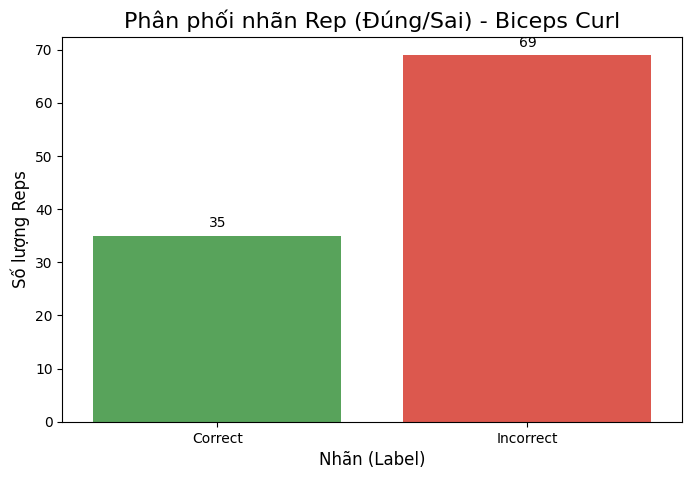

In [ ]:
OUTPUT_PLOT_IMAGE = 'bicep_label_distribution.png'

try:
    df_labeled = pd.read_csv(OUTPUT_CSV_LABELED_REPS)
    print(f"Đã đọc tệp {OUTPUT_CSV_LABELED_REPS} để vẽ biểu đồ.")

    # Vẽ biểu đồ
    plt.figure(figsize=(8, 5))
    sns.countplot(x='rep_label', data=df_labeled, palette=['#4CAF50', '#F44336'], order=['Correct', 'Incorrect'])
    
    plt.title('Phân phối nhãn Rep (Đúng/Sai) - Biceps Curl', fontsize=16)
    plt.xlabel('Nhãn (Label)', fontsize=12)
    plt.ylabel('Số lượng Reps', fontsize=12)
    
    # Hiển thị số lượng trên mỗi cột
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points')
    
    # Lưu tệp ảnh
    plt.savefig(OUTPUT_PLOT_IMAGE)
    print(f"Đã lưu biểu đồ phân phối nhãn vào: {OUTPUT_PLOT_IMAGE}")
    
    # Hiển thị biểu đồ trong Notebook
    plt.show()

except FileNotFoundError:
    print(f"LỖI: Không tìm thấy tệp {OUTPUT_CSV_LABELED_REPS}. Hãy chạy Bước 2 trước.")
except Exception as e:
    print(f"Đã xảy ra lỗi khi vẽ biểu đồ: {e}")